In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams["ps.useafm"] = True

In [57]:
plt.rcParams['font.family'] = 'Dejavu Sans'

In [7]:
import seaborn as sns

In [8]:
import plotly.express as px

In [9]:
from plotly.subplots import make_subplots

In [10]:
import plotly.graph_objects as go

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import classification_report

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.pipeline import Pipeline

In [95]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [85]:
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.multiclass import OneVsRestClassifier

In [19]:
from skmultilearn.problem_transform import BinaryRelevance

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
from skmultilearn.problem_transform import ClassifierChain

In [106]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix

In [75]:
from sklearn.manifold import TSNE

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
from tensorflow import keras

In [90]:
from tensorflow.keras import layers

In [91]:
from tensorflow.keras.models import Sequential

In [32]:
df = pd.read_csv("Dataset/train.csv")

In [33]:
df.head().style.background_gradient(cmap='Spectral')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [34]:
df.shape

(7352, 563)

In [35]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Rows Available in Dataset <b>{0}</b></h6>".format(df1.shape[0])))
display(HTML("<h6 class='messagebox messagelightgreen'>No of Columns Available in Dataset <b>{0}</b></h6>".format(df1.shape[1])))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [37]:
test_df = pd.read_csv("Dataset/test.csv")

In [39]:
test_df.sample(10).style.background_gradient(cmap='inferno')

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [41]:
duplicate_count_in_train = df.duplicated().sum()

In [42]:
duplicate_count_in_test = test_df.duplicated().sum()

In [43]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of duplicates in train Dataset <b>{0}</b></h6>".format(duplicate_count_in_train)))
display(HTML("<h6 class='messagebox messagelightgreen'>No of duplicates in test Dataset <b>{0}</b></h6>".format(duplicate_count_in_test)))

In [53]:
null_count_in_train = df.isnull().values.sum()

In [54]:
null_count_in_train

0

In [55]:
null_count_in_test = test_df.isnull().values.sum()

In [56]:
display(HTML("<h6 class='messagebox messagebrown'>No of null values in train Dataset <b>{0}</b></h6>".format(null_count_in_train)))
display(HTML("<h6 class='messagebox messagebrown'>No of null values in test Dataset <b>{0}</b></h6>".format(null_count_in_test)))

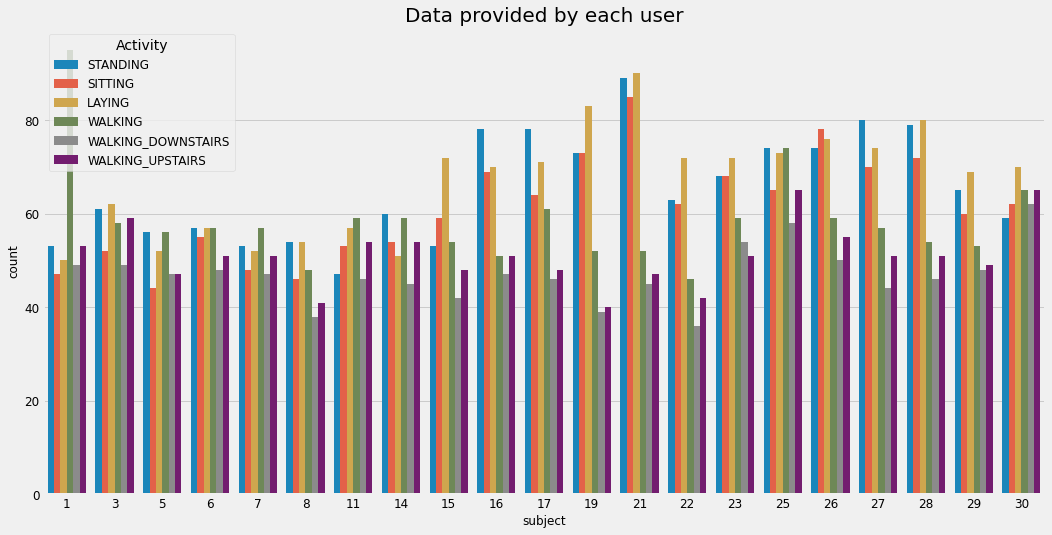

In [59]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

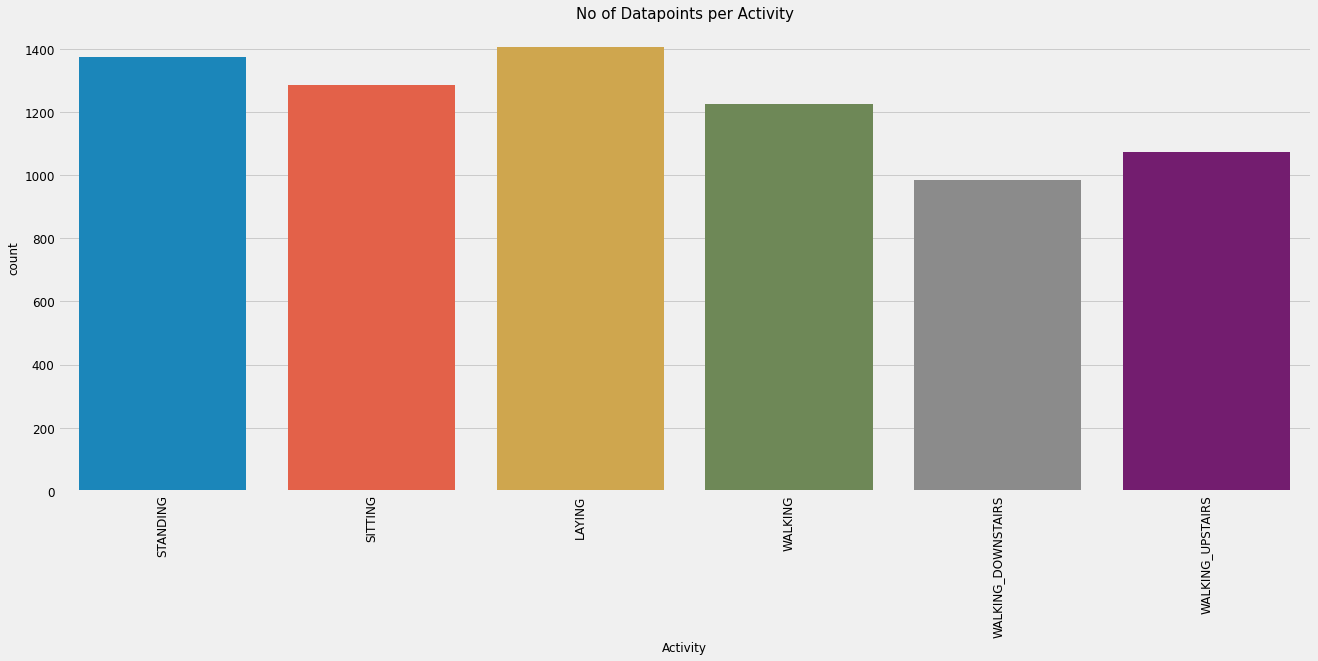

In [60]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.Activity)
plt.xticks(rotation=90)
plt.show()

In [62]:
columns = df.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

df.columns = columns
test_df.columns = columns

test_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

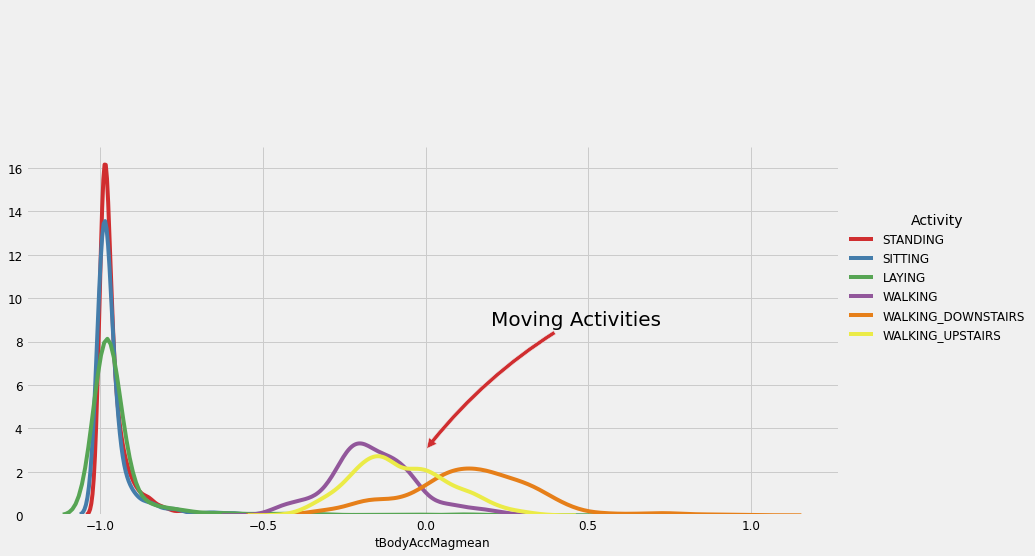

In [67]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [68]:
df1 = df[df['Activity']==1]
df2 = df[df['Activity']==2]
df3 = df[df['Activity']==3]
df4 = df[df['Activity']==4]
df5 = df[df['Activity']==5]
df6 = df[df['Activity']==6]

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMagmean', ylabel='Density'>

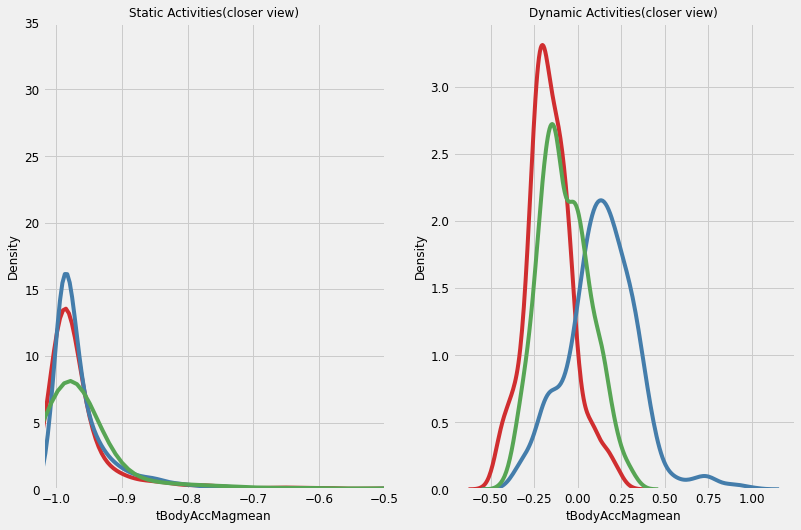

In [71]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(df[df["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(df[df["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(df[df["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(df[df["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(df[df["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(df[df["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

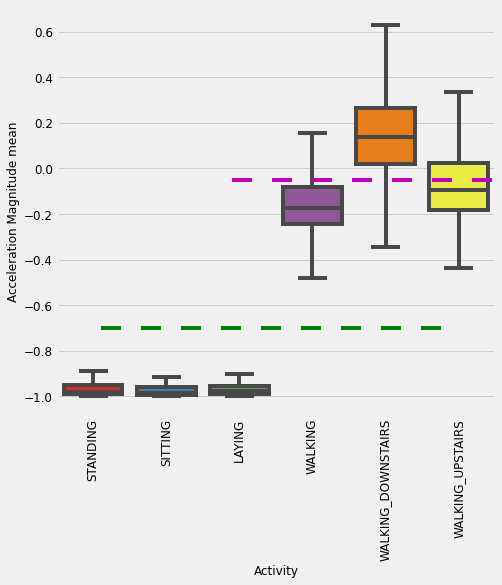

In [72]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

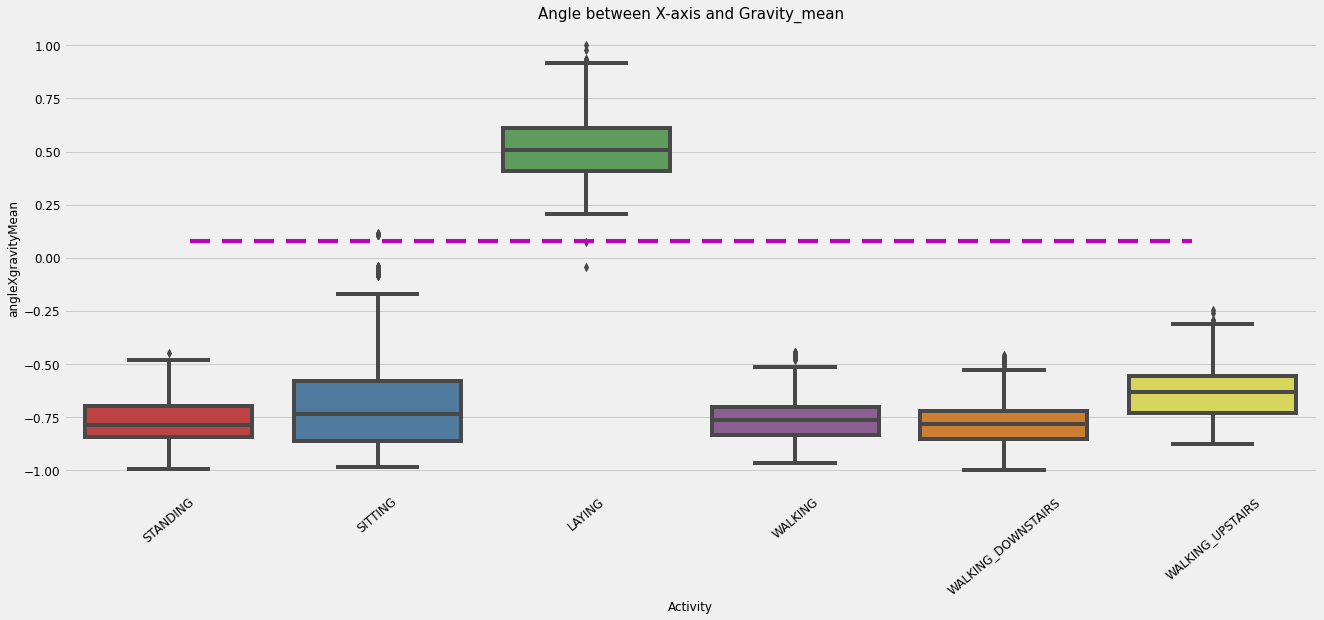

In [73]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

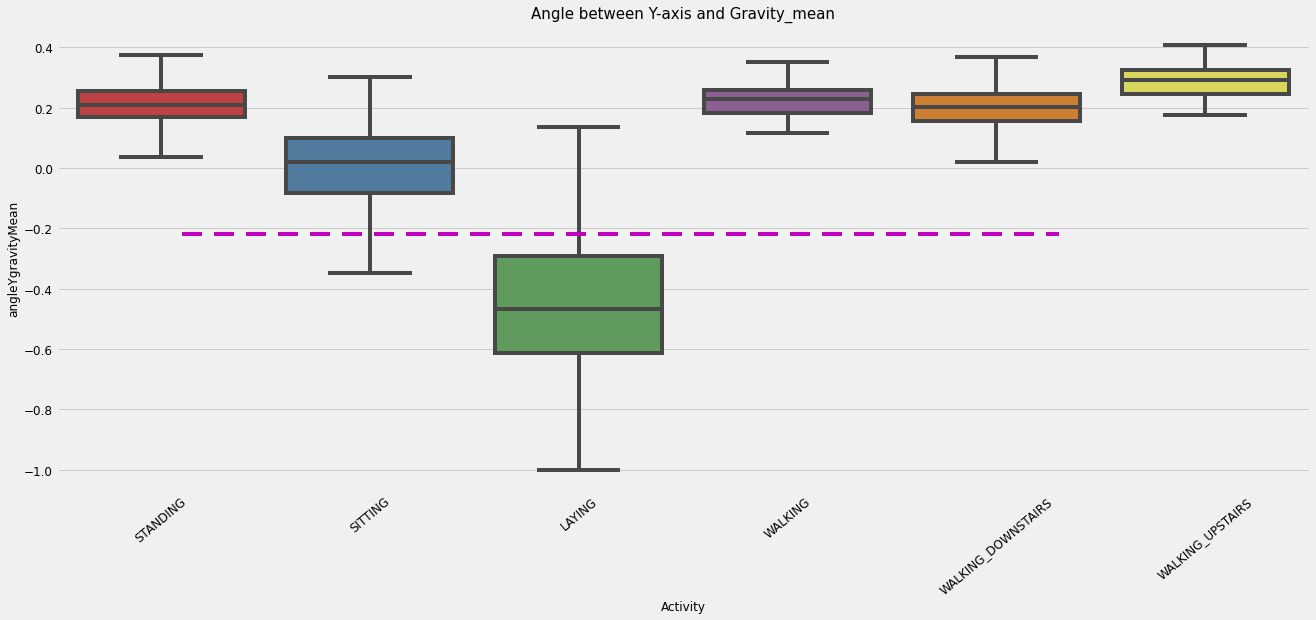

In [74]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = df, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [76]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')        
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.882s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 114.0019073, gradient norm = 0.0239965 (50 iterations in 1.061s)
[t-SNE] Iteration 100: error = 97.7571411, gradient norm = 0.0165463 (50 iterations in 

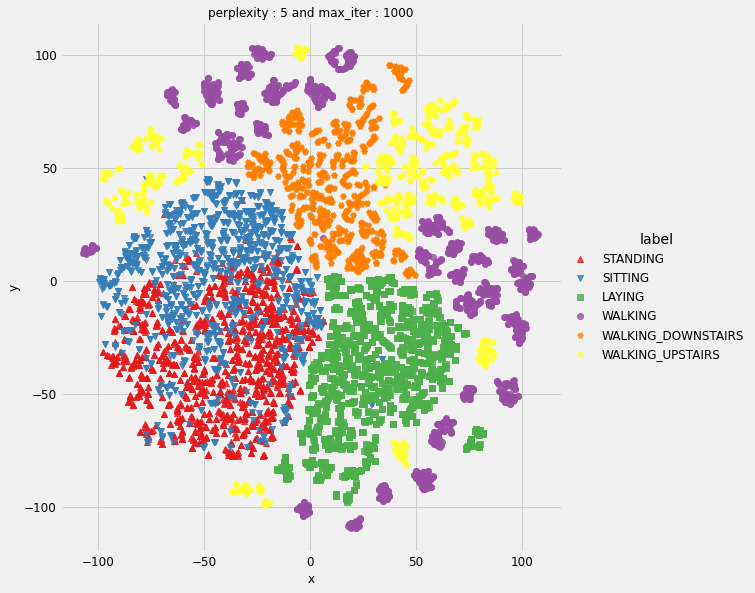

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 105.5438156, gradient norm = 0.0218139 (50 iterations in 1.264s)
[t-SNE] Iteration 100: error = 90.0001831, gradient norm = 0.0097364 (50 iteratio

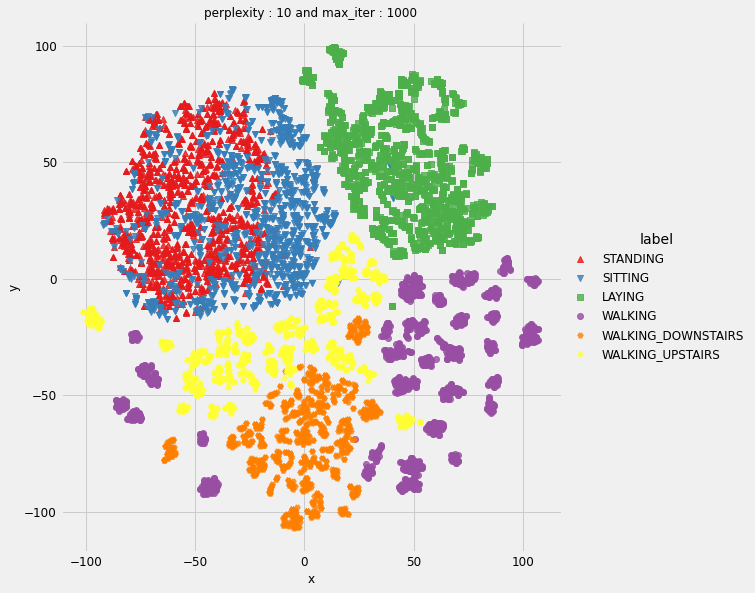

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.138s
[t-SNE] Iteration 50: error = 97.2076416, gradient norm = 0.0233864 (50 iterations in 1.506s)
[t-SNE] Iteration 100: error = 83.9163437, gradient norm = 0.0061601 (50 iteration

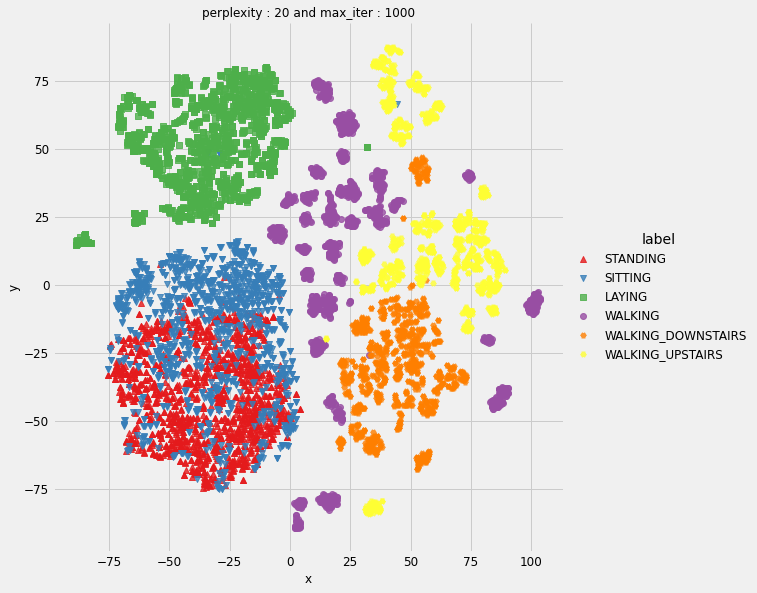

Done


In [78]:
X_pre_tsne = df.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = df['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

In [79]:
y_train = df.Activity

In [80]:
X_train = df.drop(['subject','Activity'], axis = 1)

In [81]:
y_test = test_df.Activity

In [82]:
X_test = test_df.drop(['subject','Activity'], axis = 1)

In [83]:
display(HTML("<h6 class='messagebox messagebrown'>Training data size <b>{0}</b></h6>".format(X_train.shape)))
display(HTML("<h6 class='messagebox messagebrown'>Test data size <b>{0}</b></h6>".format(X_test.shape)))

In [86]:
le = LabelEncoder()

In [87]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [92]:
scaling_data = MinMaxScaler()

In [93]:
X_train = scaling_data.fit_transform(X_train)
X_test = scaling_data.transform(X_test)

In [112]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [113]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest:", rf_accuracy)

Accuracy using Random Forest: 0.9307770614183916


In [116]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    
    plt.figure(figsize=(18,14))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

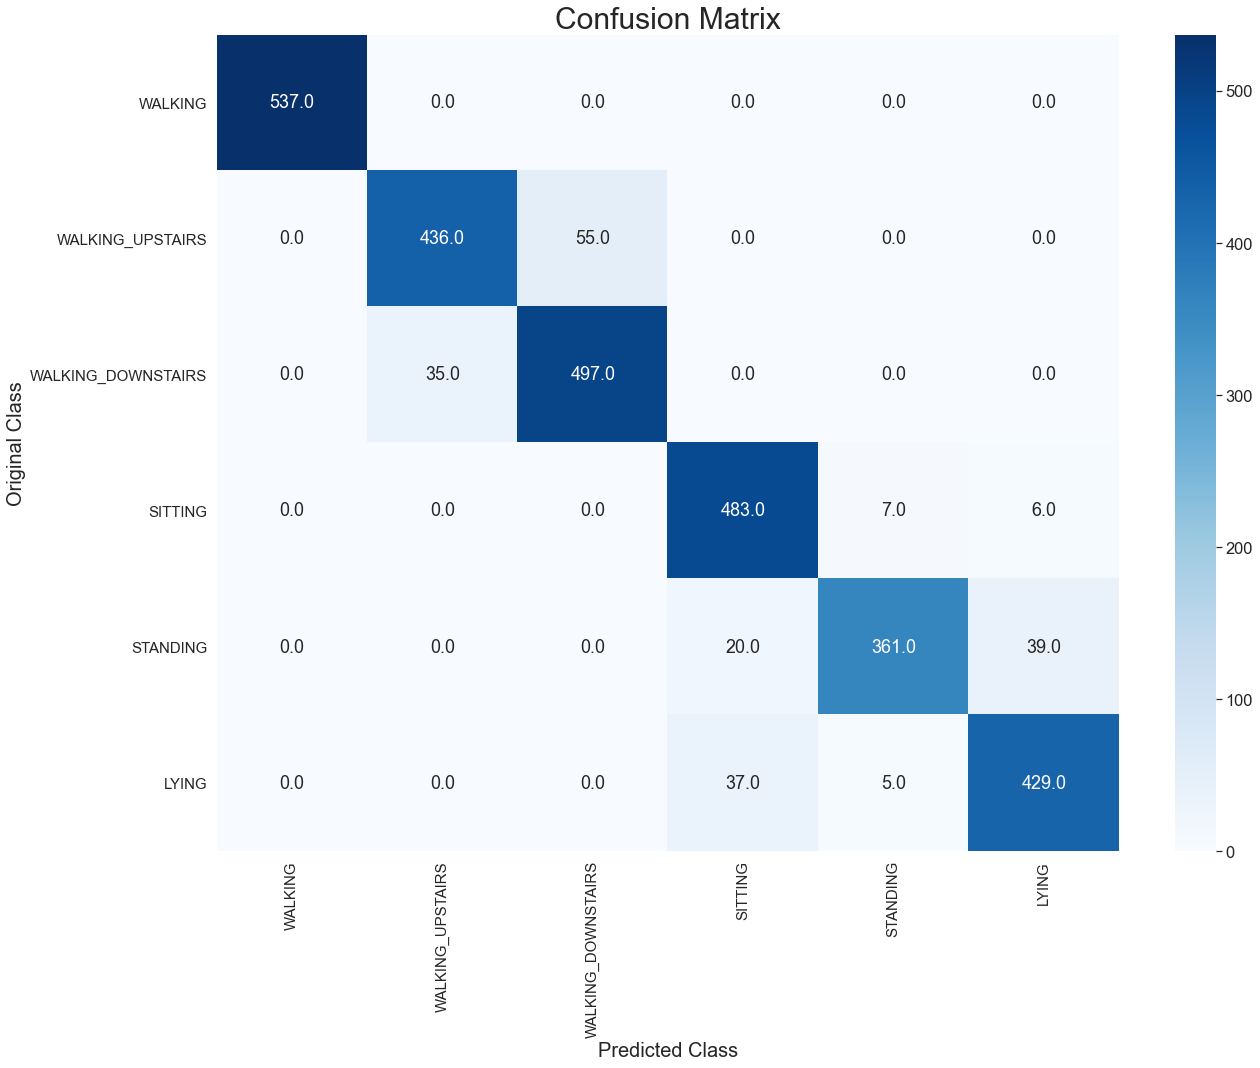

In [117]:
print_confusionMatrix(y_test, y_pred)

In [100]:
def create_deep_metric_context_learning():
    model = Sequential()
    model.add(layers.Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=X_train.shape[1]))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=6,kernel_initializer='normal',activation='softmax'))
    return model

In [101]:
model = create_deep_metric_context_learning()

In [102]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [103]:
history = model.fit(X_train, y_train, batch_size = 64, epochs= 10,validation_data = (X_test,y_test))

Epoch 1/10
115/115 [==============================] - 4s 4ms/step - loss: 1.2928 - accuracy: 0.4842 - val_loss: 1.0421 - val_accuracy: 0.6759
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.7125 - val_loss: 0.7519 - val_accuracy: 0.8130
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.8119 - val_loss: 0.5413 - val_accuracy: 0.8758
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.8619 - val_loss: 0.4260 - val_accuracy: 0.8948
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8826 - val_loss: 0.3535 - val_accuracy: 0.9019
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9000 - val_loss: 0.3090 - val_accuracy: 0.8951
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.9064 - val_loss: 0.2989 - val_accuracy: 0.8853
Epoch 

In [109]:
y_pred = model.predict(X_test)

93/93 [==============================] - 2s 739us/step
